In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# # Data Set

In [2]:
column_names = ['datetime','lat','lon','aqi','co','no','no2','o3','so2','pm2_5','pm10','nh3']
df = pd.read_csv('/kaggle/input/vietnam-aqi/data.csv',
                 names=column_names, 
                 header=None, 
                 parse_dates=["datetime"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229854 entries, 0 to 229853
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  229854 non-null  datetime64[ns]
 1   lat       229854 non-null  float64       
 2   lon       229854 non-null  float64       
 3   aqi       229854 non-null  float64       
 4   co        229854 non-null  float64       
 5   no        229854 non-null  float64       
 6   no2       229854 non-null  float64       
 7   o3        229854 non-null  float64       
 8   so2       229854 non-null  float64       
 9   pm2_5     229854 non-null  float64       
 10  pm10      229854 non-null  float64       
 11  nh3       229854 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 21.0 MB


In [4]:
df["datetime"]= pd.to_datetime(df["datetime"])

In [5]:
df.head()

,datetime,lat,lon,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-12-31 17:00:00,21.028333,105.854041,5.0,1121.52,0.11,52.78,26.11,38.15,70.68,86.48,26.60
1,2020-12-31 18:00:00,21.028333,105.854041,5.0,947.95,0.06,47.98,30.04,34.33,65.29,79.64,25.33
2,2020-12-31 19:00:00,21.028333,105.854041,5.0,847.82,0.04,43.87,32.19,32.90,63.35,76.71,24.57
3,2020-12-31 20:00:00,21.028333,105.854041,5.0,787.74,0.05,42.84,31.83,32.90,62.82,75.45,23.56
4,2020-12-31 21:00:00,21.028333,105.854041,5.0,741.01,0.07,42.50,30.40,34.33,62.48,74.61,22.04


In [6]:
df.loc[df["no2"] <= 0, "no2"] = df["no2"].median()
df.loc[df["pm10"] <= 0, "pm10"] = df["pm10"].median()
df.loc[df["pm2_5"] <= 0, "pm2_5"] = df["pm2_5"].median()
df.loc[df["o3"] <= 0, "o3"] = df["o3"].median()

In [7]:
df.head()

,datetime,lat,lon,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-12-31 17:00:00,21.028333,105.854041,5.0,1121.52,0.11,52.78,26.11,38.15,70.68,86.48,26.60
1,2020-12-31 18:00:00,21.028333,105.854041,5.0,947.95,0.06,47.98,30.04,34.33,65.29,79.64,25.33
2,2020-12-31 19:00:00,21.028333,105.854041,5.0,847.82,0.04,43.87,32.19,32.90,63.35,76.71,24.57
3,2020-12-31 20:00:00,21.028333,105.854041,5.0,787.74,0.05,42.84,31.83,32.90,62.82,75.45,23.56
4,2020-12-31 21:00:00,21.028333,105.854041,5.0,741.01,0.07,42.50,30.40,34.33,62.48,74.61,22.04


In [8]:
df['station'] = df[['lat', 'lon']].astype(str).agg('_'.join, axis=1)
df['station_id'] = df['station'].astype('category').cat.codes
df=df.drop(['station', 'lat', 'lon'], axis=1)

In [9]:
df.head()

,datetime,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,station_id
0,2020-12-31 17:00:00,5.0,1121.52,0.11,52.78,26.11,38.15,70.68,86.48,26.60,5
1,2020-12-31 18:00:00,5.0,947.95,0.06,47.98,30.04,34.33,65.29,79.64,25.33,5
2,2020-12-31 19:00:00,5.0,847.82,0.04,43.87,32.19,32.90,63.35,76.71,24.57,5
3,2020-12-31 20:00:00,5.0,787.74,0.05,42.84,31.83,32.90,62.82,75.45,23.56,5
4,2020-12-31 21:00:00,5.0,741.01,0.07,42.50,30.40,34.33,62.48,74.61,22.04,5


In [10]:
station_id = 5
df = df[df['station_id'] == station_id]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38309 entries, 0 to 38308
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    38309 non-null  datetime64[ns]
 1   aqi         38309 non-null  float64       
 2   co          38309 non-null  float64       
 3   no          38309 non-null  float64       
 4   no2         38309 non-null  float64       
 5   o3          38309 non-null  float64       
 6   so2         38309 non-null  float64       
 7   pm2_5       38309 non-null  float64       
 8   pm10        38309 non-null  float64       
 9   nh3         38309 non-null  float64       
 10  station_id  38309 non-null  int8          
dtypes: datetime64[ns](1), float64(9), int8(1)
memory usage: 3.3 MB


In [11]:
# Target: PM2.5
y = df['pm2_5']

# Exogenous features (you can customize)
exog = df[['pm10', 'no2', 'o3', 'co', 'so2', 'nh3', 'no']]

In [12]:
train_size = len(df) - 168
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
exog_train, exog_test = exog.iloc[:train_size], exog.iloc[train_size:]

In [13]:
model = SARIMAX(endog=y_train, exog=exog_train, order=(1, 1, 1))
results = model.fit(disp=False)

In [14]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  pm2_5   No. Observations:                38141
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -66886.227
Date:                Mon, 16 Jun 2025   AIC                         133792.454
Time:                        12:34:37   BIC                         133877.944
Sample:                             0   HQIC                        133819.575
                              - 38141                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pm10           0.8989      0.000   3615.034      0.000       0.898       0.899
no2           -0.0156      0.001    -17.701      0.000      -0.017      -0.014
o3             0.0135      0.000     55.245      0.0

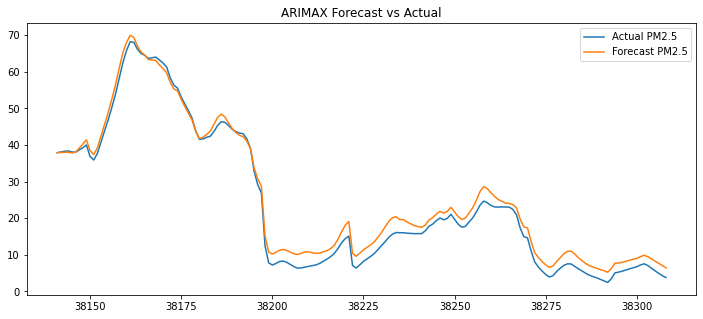

In [15]:
forecast = results.forecast(steps=168, exog=exog_test)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test.values, label='Actual PM2.5')
plt.plot(y_test.index, forecast.values, label='Forecast PM2.5')
plt.legend()
plt.title('ARIMAX Forecast vs Actual')
plt.show()
